# <center> **CS 391, Spring 2021, Homework 3**
### <center> Due **Tuesday, February 16, 11:59 pm ET (Boston time)**, via Gradescope




### **Submission guidelines** 
Please write your solutions inside of this .ipynb file, then convert it to a PDF before submitting on Gradescope:

*   **In Jupyter:** File > Download as > PDF
*   **In Google Colab:** File > Print > Destination > Save as PDF

When you submit, please **be sure to match the answers on your PDF to the outline on Gradescope.** In other words, if the answer to problem 2.1 is on pages 2 and 3 of your PDF, please be sure to select those pages as the answer to problem 2.1 on Gradescope. Since it takes significantly longer to grade homework that is not properly matched, **we may deduct points** for noncompliant submissions.

The lab on Wednesday 1/27 covers how to get started with the notebooks for writing problem solutions and running experiments. In case you haven't done so, please sign up to the course Gradescope, with the access code **ERV7B2**: https://www.gradescope.com/courses/232562.

<div style="page-break-after: always;"></div>

## **1. Problem Solving** 

Let $G_1(V,E_1)$ and $G_2(V,E_2)$ be two graphs on the same set of nodes $V$ but (possible) different set of edges $E_1$ and $E_2$. The *edit distance* between $G_1$ and $G_2$ is the number of node pairs, such that there is an edge in one graph but not in the other. That is
$\mathrm{dist}(G_1,G_2) = | E_1\setminus E_2| + |E_2 \setminus E_1|.$ Here "$\setminus$" is the set-minus operation.

### **1.1**


Prove that $\mathrm{dist}(G_1,G_2)$ is a metric. 


**Answer:**
Recall the definition of a metric for a function $d: X \times X \longrightarrow \mathbb{R}$ 
a function **d** is a metric if:
1. $dist(x, y) \geq 0$  (non negativity)
2. $dist(x,y) = 0$ **if and only if** $x = y$ (isolation)
3. $dist(x,y) = dist(y,x)$ (symmetry)
4. $dist(x,y) \leq dist(x,z) + dist(z,y)$ (triangle inequality)


Next, therefore, we can prove as asked from us by proving all 4 cases as mentioned above.


1. Since $dist(G_1, G_2) = |E_1 - E_2| + |E_2 - E_1|$, we can claim that it is always positive or 0, since the addition of two absolute value expressions is never negative. Therefore, $dist(G_1, G_2) \geq 0\quad \blacksquare$
2. If $G_1 = G_2$ (given as hypothetic condition), we can confidently claim that $dist(G_1,G_2) = dist(G_1,G_1) = dist(G_2,G_2)$, which since it represents the distant from one node into itslef (referring to the same initial node), it stands for a non existent distance, and hence we claim $dist(G_1,G_2) = dist(G_1,G_1) = dist(G_2,G_2) = 0 \quad \blacksquare$
3. $dist(G_1, G_2) = |E_1 - E_2| + |E_2 - E_1| = |E_2 - E_1| + |E_1 - E_2| = dist(G_2, G_1) = dist(G_1, G_2) \quad \blacksquare$
4. Let $G_3$ be another graph on the set of nodes as $G_1$ and $G_2$ but (possible) different set of edges $E_3$. Therefore, we can claim that since the distance from $G_1$ to $G_3$ is nonnegative unless $G_1 = G_3$, (see proofs 1 and 2), that adding any additional point $G_3$ to the distance path from $G_1$ to $G_2$ will either enlengthen the path and hence the distance ($dist(G_1,G_2) < dist(G_1,G_3) + dist(G_3,G_2)$), unless the point-graph $G_3$ is already on the shortest path from $G_1$ to $G_2$, in which case $dist(G_1,G_2) = dist(G_1,G_3) + dist(G_3,G_2)$. Therefore, we can confidently claim that $dist(G_1,G_2) \leq dist(G_1,G_3) + dist(G_3,G_2)\quad\blacksquare$

Now, since all 4 conditions have been proved, we can say that $dist(G_1, G_2)$ **is a metric**!!

### **1.2**
Given  $3$ graphs $G_1, G_2, G_3$ on the same set of nodes but different set of edges (that is $G_3 = (V,E_3)$). Find a graph $G(V,E)$, such that the total distance 
$\mathrm{dist}(G, G_1, G_2, G_3) = \sum_{i=1}^3 \mathrm{dist}(G,G_i)$
is minimized. 



Describe the algorithm to find $G$. You may use English or pseudocode (or a combination of it). Your description should be clear enough for somebody familiar with implementing graph algorithms (everybody in CS330 should be able to ;) ) would be able to implement it.

**Answer:**
Let's simplify the question: we are asked to find a graph $G(V,E)$ such that $dist(G, G_1, G_2, G_3)$ is minimized.

The algorithm would begin by setting up a hash table, where the first column (the key) stands for a certain edge (representing the connection between two nodes) for every possible variation of two nodes (every possible edge on the graph), and the value corresponding to each key is the number of graphs (out of the three provided graphs $G_1$, $G_2$, and $G_3$ in which that edge appears (the two spoken nodes are connected).
The time complexity for the first step (scanning the graphs and compiling a hash table) would be $O(3n) = O(n)$ where n is the number of all possible edge (number of connections in a graph where all nodes are connected to each other).

In step two, after the hash map is established by scanning the graphs, each key in the hash map would have a value of either 0,1,2, or 3, representing the number of graphs with that specific edge (between those two specific nodes (x,y)). Each edge with the value of 3, will automatically appear in the final minimized graph G, since that edge is shared with every single one of three provided graphs. Every key with the value 0, will not be included in the final minimized graph, since not a single one of the three provided graphs includes that edge. For every key that holds the value 1, we know that exactly one graph has that edge in its structure, but since it is not the majority of the graphs, we can count every key with the value of 1 as another step necessary to create G from the graph that contains that edge (by removing that edge), which can be implemented by steps++ where steps in a variable tracking the value of $dist(G, G_1, G_2, G_3)$. Similarly, for every key (node connection = edge) that holds the value of 2 in the hash map, we know that exactly two graphs of the three provided share it, which should be included in the final minimized graph G. Every such key in the hash map can be considered to add another steps++ to our steps variable that tracks the value of $dist(G, G_1, G_2, G_3)$, since it stands for a connection (edge) that must be added to the 1 graph of the three that doesn't have it, in order to turn it to the G master final minimized graph. This step is also considered an O(n), since we are only traversing through the hashmap to scan for the value of each key, where the hash map has a length n, which stands for the number of edges.

### **1.3**
 Prove that the $G$ found by your algorithm is indeed minimizing the distance.

**Answer:**
Let's begin by recalling that $dist(G, G_1, G_2, G_3) = \sum_{i=1}^3 dist(G, G_i) = dist(G, G_1) + dist(G, G_2) + dist(G, G_3) = |E - E_1| + |E_1 - E| + |E - E_2| + |E_2 - E| + |E - E_3| + |E_3 - E| = 2\cdot|E - E_1| + 2\cdot|E - E_2| + 2\cdot|E - E_3|$, where G contains the most shared edges between E and $E_i$ for $i \in \{1, 2, 3\}$ such that the difference between E, $E_1$, $E_2$, $E_3$ is completely minimized since G shares all common (and majorly common) nodes among all (or the majority) of the three graphs $G_1$, $G_2$, $G_3$. Therefore, since all elements $|E - E_1|$, $|E - E_2|$, and $|E - E_3|$ are minimized, we can conclude that **the G found by the algorithms indeed minimized the distance** calculated as $dist(G, G_1, G_2, G_3)$.

### **2. Data Analysis**

For this question, you will look at a dataset containing information about three different species of penguins, compiled in the Palmer penguins dataset:  https://pypi.org/project/palmerpenguins/.

You will use a Gaussian Mixture Model to categorize the individual penguins into the three different species based on four numerical features: culmen length, culmen depth, flipper length, and body mass.

Here is the dataset:


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/catabia/cs391_spring21/main/penguins_size.csv')

# this line eliminates all rows with NaN values:
df = df.dropna()

df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### **2.1**

Create a scatterplot showing body mass on one axis and flipper length on the other.  Represent each species using a different color.  By just looking at it, do you think that the different species cluster nicely into three separate groups, or do they overlap?

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

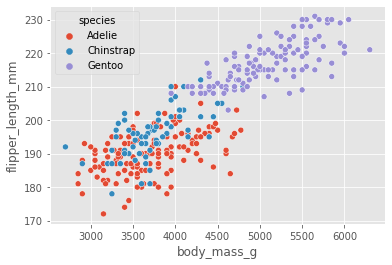

In [2]:
# Answer:
sns.scatterplot(data = df, x ='body_mass_g', y = 'flipper_length_mm', hue = 'species')

**Answer:** 

They fit pretty well into specific groups. We can see that the Gentoo species has a much greater ratio of flipper length to body mass, while the other two species don't.
By averaging out (approximately) the scattered points, however, between the last two species (Adelie and Chinstrap), we see that the Adelie specie appears with a slightly lower ratio, as it is scattered more towards the Origins Point of the graphs.

## **2.2**
Create a histogram of penguin culmen depth, again representing each species of penguin with a different color.  Looking at this plot, do you think a GMM would be a good model for this data?  Why or why not? In your argument you should say whether you think we can fit some number of Gaussians to it.

Text(0.5, 1.0, 'Penguin Culmen Depth By Species')

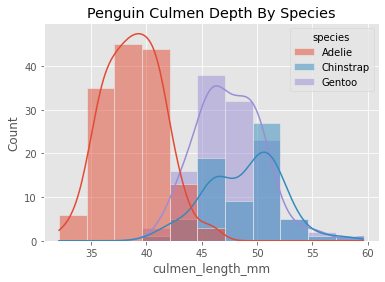

In [6]:
# Answer:
sns.histplot(data=df, x='culmen_length_mm', hue='species', kde = True)

plt.title("Penguin Culmen Depth By Species")

**Answer:** 
In my opnion, yes - a GMM would be helpful in this case. By using a GMM to represent the subpopulations on the penguins based on species and culmen lengths and taking the central column of the graph above the columns, we can approximate relatively accurately the group to which a certain penguin (based on their clumen length in milimeters) belongs. This could be implemened and applied to machine learning algorithms where based on used data, the algorithm will deteremine the group to which a certain penguin (based on its clumen length) will belong. All in all, I also think that we could fit some number of Gaussians in it, which will allows us to give the machine an ability (to a certain extent) to guess relatively precisely to which subpopulations an items of the greater population belongs.

### **2.3**
When we fit the Gaussian Mixture Model (GMM), how many components should we instruct it to identify and why?

**Answer:** 

We should instruct the same amount of compnents as the amount of subpopulations, which will allow us to more strictly determine the group to which a certain items or object of the greater population belongs to.

### **2.4**

Use the GMM method from scikit learn to categorize the data based on only the following four features:  culmen length, culmen depth, flipper length, body mass.

In [7]:
# Answer:

from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components = 3)

X = df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']]

gmm.fit(X)

labels = gmm.predict(X)

df['label'] = labels

# the following line makes Jupyter display the entire DataFrame, without any ...s
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(df[['species', 'label']])

       species  label
0       Adelie      2
1       Adelie      2
2       Adelie      2
4       Adelie      2
5       Adelie      2
6       Adelie      2
7       Adelie      2
12      Adelie      2
13      Adelie      2
14      Adelie      2
15      Adelie      2
16      Adelie      2
17      Adelie      2
18      Adelie      2
19      Adelie      2
20      Adelie      2
21      Adelie      2
22      Adelie      2
23      Adelie      2
24      Adelie      2
25      Adelie      2
26      Adelie      2
27      Adelie      2
28      Adelie      2
29      Adelie      2
30      Adelie      2
31      Adelie      2
32      Adelie      2
33      Adelie      2
34      Adelie      2
35      Adelie      2
36      Adelie      2
37      Adelie      2
38      Adelie      2
39      Adelie      2
40      Adelie      2
41      Adelie      2
42      Adelie      2
43      Adelie      2
44      Adelie      2
45      Adelie      2
46      Adelie      2
48      Adelie      2
49      Adelie      2
50      Ad

### **2.5**
Evaluate the GMM you created in **2.4**. How well did it perform?  Base your argument on whether it made any  misclassifications and how many?  Did it do better on some species than others?  How does this relate to the figures you produced in **2.1** and **2.2**?

**Answer:**
The figure produced in **2.1** and **2.2** present us with distributions of the different subpopulations according to different factors (different categories, or filters if you wish). The GMM from **2.4** presents us with with the prediction of all elements of the whole set (penguins within the entire population) into their subpopulations based on the various data ditrbutions taken into account (the 4 factors registered into the GMM algorithm). Or in other words, it would take 4 different graphs and present them in one table in which all elements (penguins) are polarized and divided into subpopulations.